# Iron metal (3D bulk)

In [28]:
import matplotlib.pyplot as plt
import numpy as np
import junpy as jp
import jpdataset
from junpy.factory import nanodcal

In [3]:
filename = jpdataset.get(
    'nanodcal/bulk_iron/LDA_SP/bcc_primitive_1x1x1/NanodcalStructObject.mat')
device = nanodcal.load_nanodcal_device(filename)

In [4]:
calcr = jp.BulkBandStructure(
    device=device,
    kpoints=jp.BandPathKspaceSampling2(
        paths=['G', 'H', 'N', 'G', 'P', 'H', 'P', 'N'],
        points_per_path=20,
        special_points={
            'G': [0   , 0   , 0   ],
            'H': [0.5 , -0.5, 0.5 ],
            'N': [0   , 0   , 0.5 ],
            'P': [0.25, 0.25, 0.25],
        },
    ),
    fermiEnergy=device.hsdata.fermiEnergy,
    is_projected=True,
)
jp.run(calcr, savefile=False)

JunPy version---------------------------: 0.15.0.post29+ga5b3260
Parallelization information
    BLAS Vendor-----------------------------: MKL
    Total number of MPI processes-----------: 1
    OMP_NUM_THREADS-------------------------: 1
    MKL_NUM_THREADS-------------------------: unset
    OPENBLAS_NUM_THREADS--------------------: unset
Calculating bulk band structure... (2024-08-08 15:39:06)
    Device information
        numberOfSites---------------------------: 1
        spinType--------------------------------: SpinType.CollinearSpin
    K-space sampling
        samplingName----------------------------: BandPathKspaceSampling2
        paths-----------------------------------: ['G', 'H', 'N', 'G', 'P', 'H', 'P', 'N']
        points_per_path-------------------------: 20
        numReducedKpoints-----------------------: 141
    Runtime message
        Calculate over k-space...
            Start MPI execution...
            -->   5.7% finished (Elapsed time: 0:00:00.021135)
       

In [21]:
print(calcr.kspaceSampling.reducedKpoints.shape)
print(calcr.band_energies().shape)

plt.plot()

(141, 3)
(141, 15, 2)


In [27]:
bp = jp.BandStructurePlotter(
    kpoints=calcr.kspaceSampling.reducedKpoints,
    special_points_indices=calcr.kpoints.special_points_indices,
    energies=calcr.band_energies()[:,:,0],
    weights =  calcr.spin_weights_pauli(),
    #weights=np.c_[calcr.atom_weights()[:,0,:], calcr.atom_weights()[:,0,:]],
    #weights=np.array([
    #    sw_x,
    #    sw_y,
    #    sw_z,
    #    aw_FM,
    #    aw_TMD,
    #    aw_FMTMD,
    #]),
)

bp.create_data(interpolation=200)

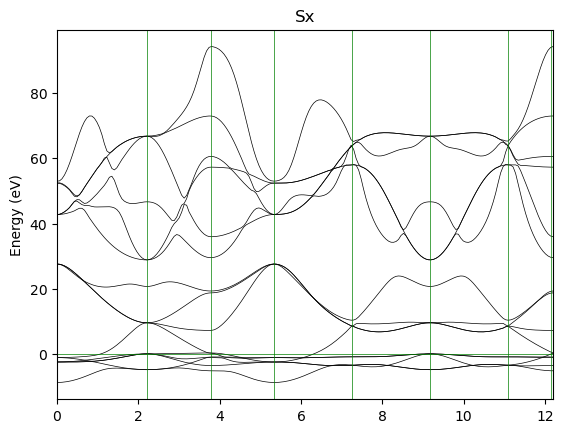

In [31]:
plt.figure()
plt.title('Sx')
bp.plot_band_energies('-k')
#bp.plot_projection_scatter(proj_id=0, norm=colors.Normalize(-1, 1), alpha=1, s=20)
bp.plot_special_points_xaxis(color='g', linewidth=0.5)
plt.axhline(0, color='g', linewidth=0.5)
#plt.ylim(-10, 10)
#plt.savefig('fig_Sx', dpi=150)